In [4]:
!pip install matplotlib
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


## Load Experiments

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

df = pd.read_csv('result.csv', delimiter=';')
print(df)

      Interation         Algorithm     DatasetName  DatasetSize   Time Insere  \
0              0           avlTree         Ordered           10  3.000000e-02   
1              0           avlTree  OrderedInverse           10  9.800000e-02   
2              0      binarySearch         Ordered           10  1.360000e-01   
3              0      binarySearch  OrderedInverse           10  5.000000e-03   
4              0  binarySearchTree         Ordered           10  1.040000e-01   
...          ...               ...             ...          ...           ...   
1435           9      linearSearch          Random      1000000  5.213080e+06   
1436           9      linearSearch  OrderedInverse      1000000  5.215570e+06   
1437           9  binarySearchTree   AlmostOrdered      1000000  1.947440e+07   
1438           9  binarySearchTree  OrderedInverse      1000000  2.084750e+07   
1439           9  binarySearchTree         Ordered      1000000  2.101550e+07   

      Counter Comparisons I

In [6]:
df.columns

Index(['Interation', 'Algorithm', 'DatasetName', 'DatasetSize', 'Time Insere',
       'Counter Comparisons Insere', 'Time Pesquisa',
       'Counter Comparisons Pesquisa', 'Time Retira',
       'Counter Comparisons Retira'],
      dtype='object')

In [7]:
df

,Interation,Algorithm,DatasetName,DatasetSize,Time Insere,Counter Comparisons Insere,Time Pesquisa,Counter Comparisons Pesquisa,Time Retira,Counter Comparisons Retira
0,0,avlTree,Ordered,10,3.000000e-02,14,0.002,7,0.002,9
1,0,avlTree,OrderedInverse,10,9.800000e-02,12,0.001,7,0.001,11
2,0,binarySearch,Ordered,10,1.360000e-01,8,0.002,7,0.002,13
3,0,binarySearch,OrderedInverse,10,5.000000e-03,13,0.001,7,0.002,8
4,0,binarySearchTree,Ordered,10,1.040000e-01,15,0.001,13,0.001,3
...,...,...,...,...,...,...,...,...,...,...
1435,9,linearSearch,Random,1000000,5.213080e+06,500003,9757540.000,1000002,4707580.000,1000003
1436,9,linearSearch,OrderedInverse,1000000,5.215570e+06,500003,9791360.000,1000002,4686410.000,1000003
1437,9,binarySearchTree,AlmostOrdered,1000000,1.947440e+07,1125031,4235350.000,1125029,632.311,29
1438,9,binarySearchTree,OrderedInverse,1000000,2.084750e+07,1000001,4342580.000,999999,25.859,3


# Get mean and std of metrics

In [3]:
result = df.groupby(['Algorithm',
            'DatasetName',
            'DatasetSize'])[['Time Insere',
                            'Counter Comparisons Insere',
                            'Time Pesquisa',
                            'Counter Comparisons Pesquisa',
                            'Time Retira',
                            'Counter Comparisons Retira']].agg(['mean', 'std'])

In [4]:
# Aplainando os índices das colunas
result.columns = ['_'.join(col).strip() for col in result.columns.values]

# Redefinindo o índice para retornar um DataFrame
result.reset_index(inplace=True)

In [5]:
df = result

# Compute charts of comparison

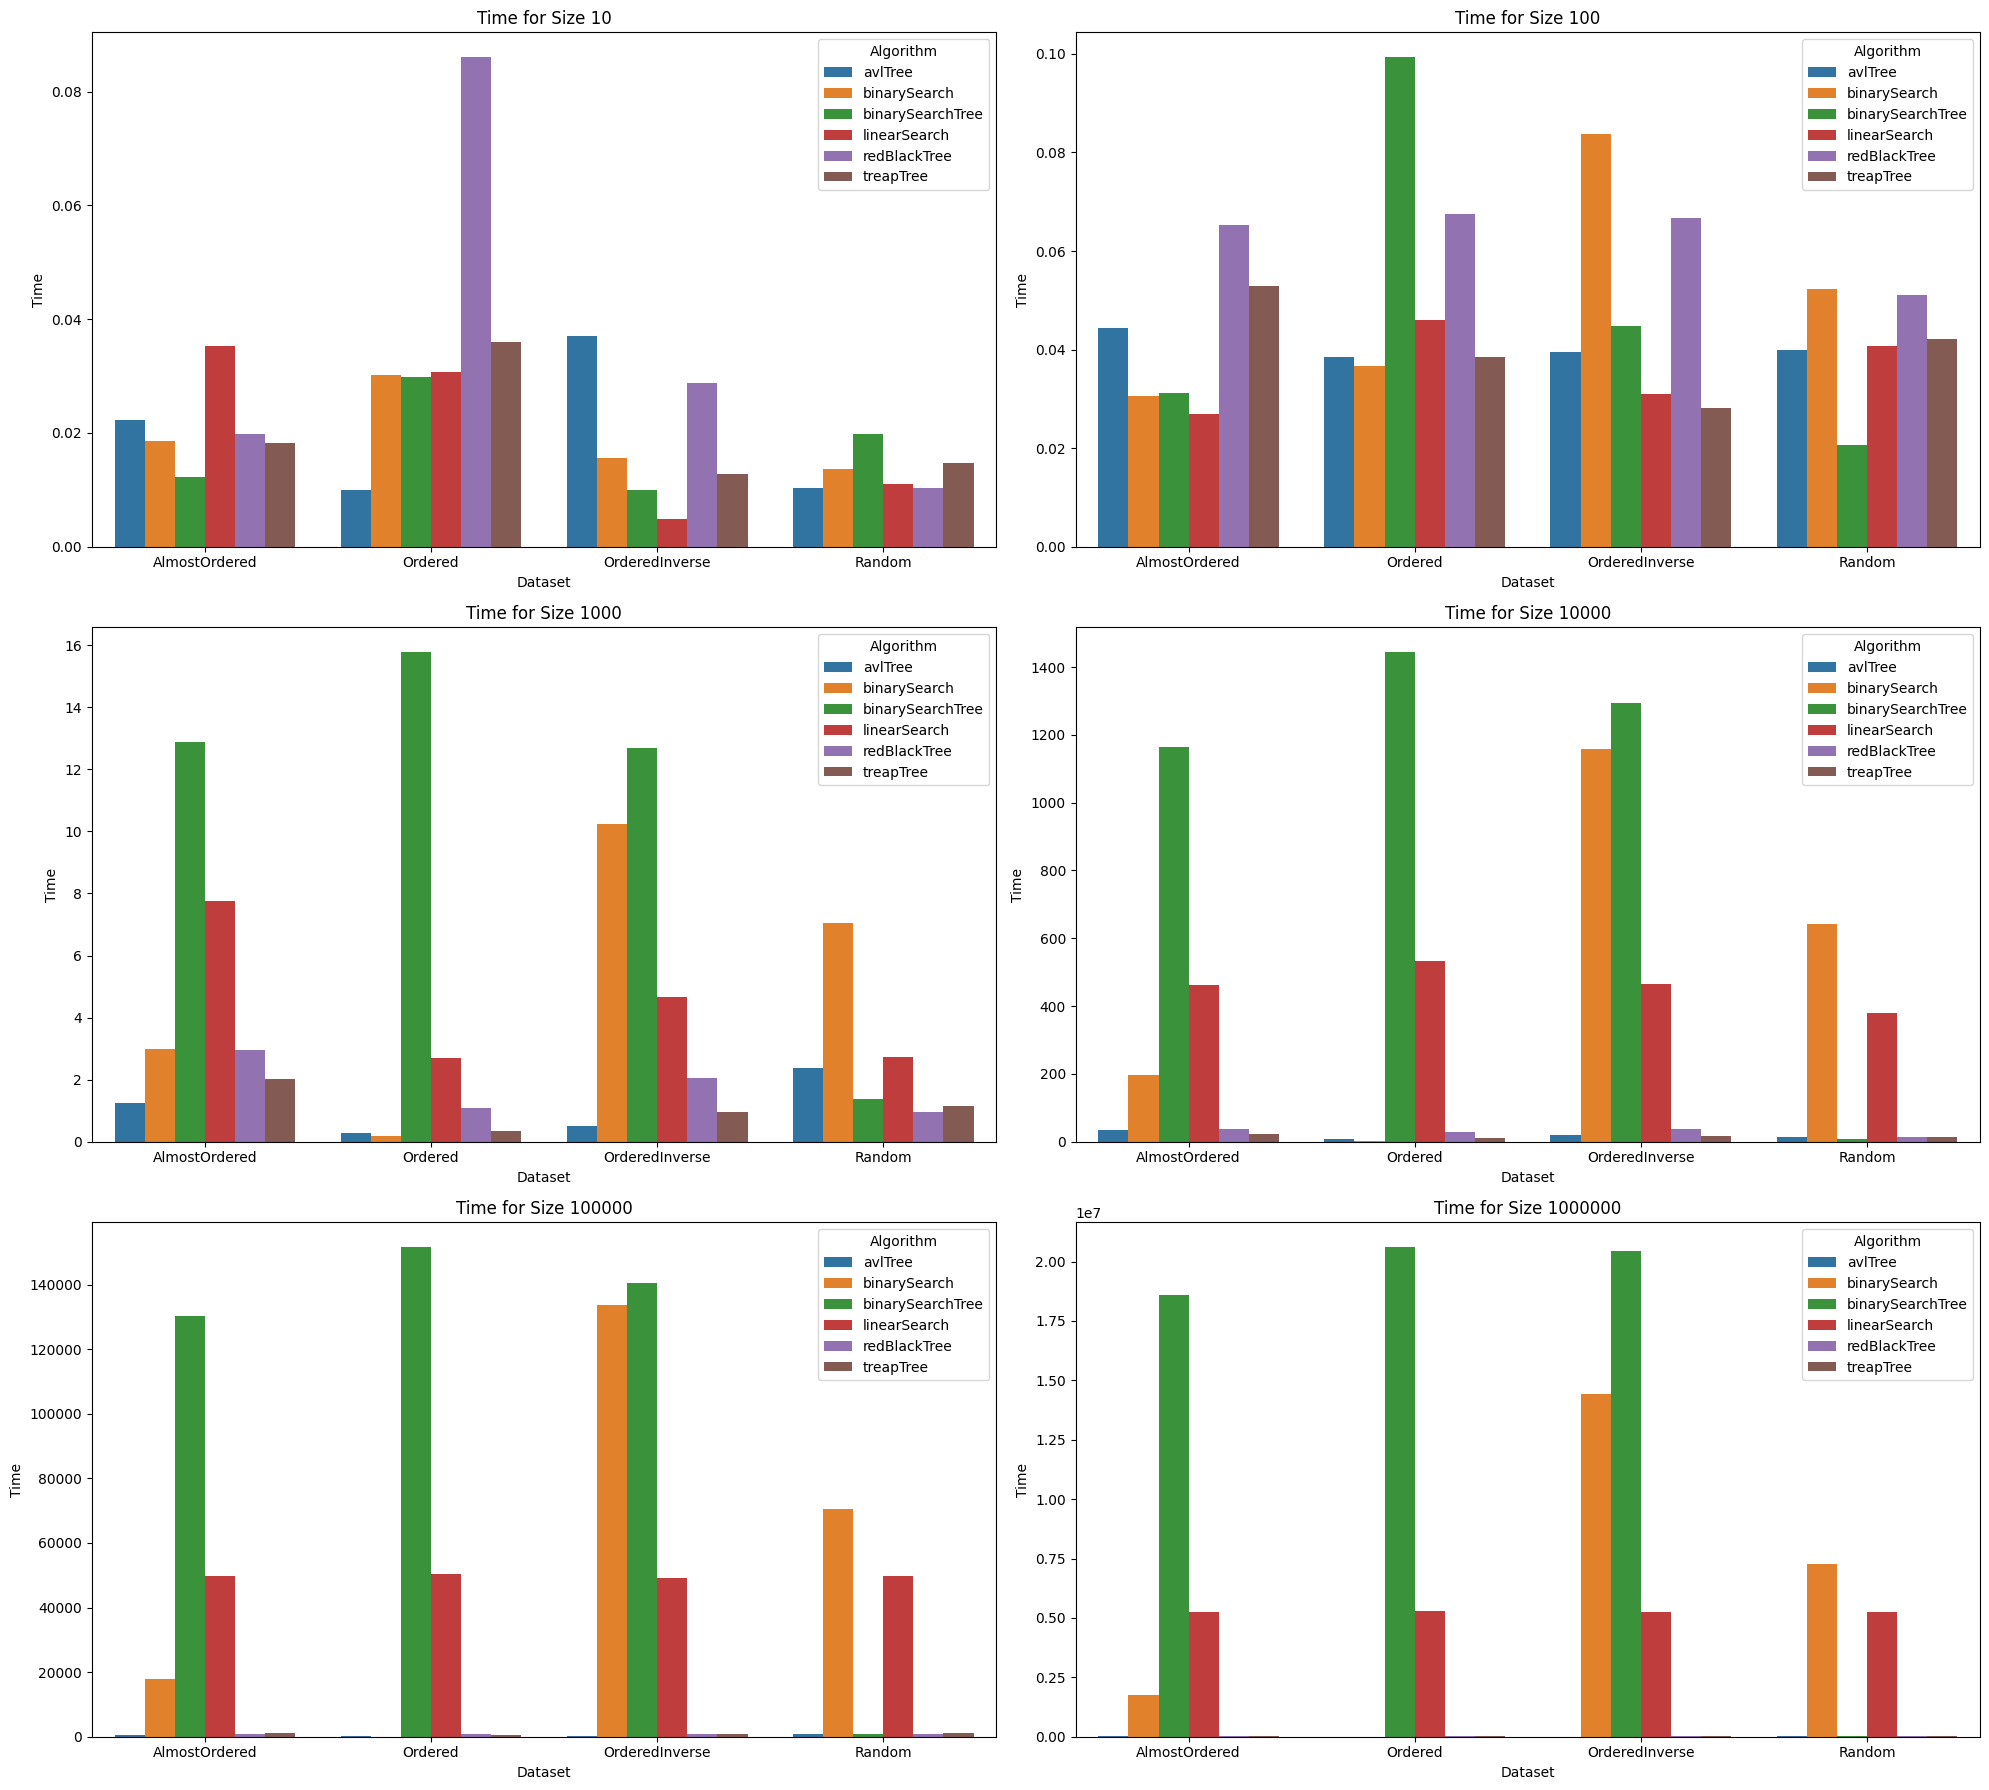

In [7]:
unique_sizes = df.DatasetSize.unique()
num_sizes = len(unique_sizes)

# Calculate the number of rows and columns for the GridSpec layout
num_cols = 2
num_rows = (num_sizes + num_cols - 1) // num_cols

# Create the figure and GridSpec layout
fig = plt.figure(figsize=(20, 6 * num_rows))
gs = fig.add_gridspec(num_rows, num_cols)

# Iterate over each dataset size and plot the corresponding data
for i, size in enumerate(unique_sizes):
    row = i // num_cols
    col = i % num_cols
    ax = fig.add_subplot(gs[row, col])
    df_subset = df[df.DatasetSize == size]
    sns.barplot(data=df_subset, x='DatasetName', y='Time Insere_mean', hue='Algorithm', ax=ax)
    ax.set_title(f'Time for Size {size}')
    ax.set_xlabel('Dataset')
    ax.set_ylabel('Time')

# Adjust the layout
plt.tight_layout()
plt.show()

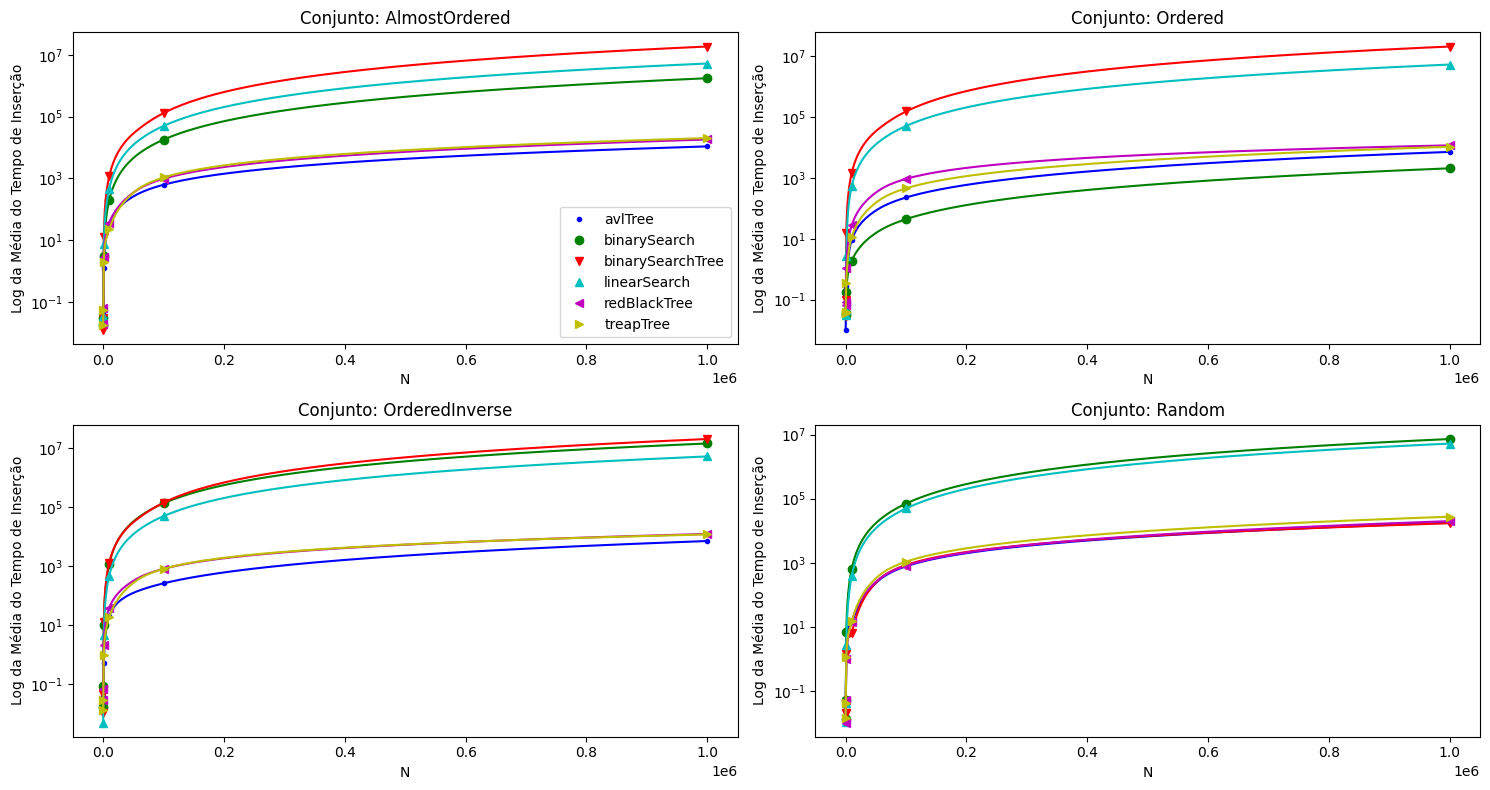

In [9]:
import matplotlib.pyplot as plt
import matplotlib.markers as mmarkers
import numpy as np
from scipy.interpolate import interp1d

num_sizes = len(df['DatasetName'].unique())

# Calculate the number of rows and columns for the GridSpec layout
num_cols = 2
num_rows = (num_sizes + num_cols - 1) // num_cols

# Create the figure and GridSpec layout
fig = plt.figure(figsize=(15, 4 * num_rows))
gs = fig.add_gridspec(num_rows, num_cols)

# Define colors and markers for the algorithms
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = list(mmarkers.MarkerStyle.filled_markers)

# Iterate over each dataset size and plot the corresponding data
for i, dataset in enumerate(df['DatasetName'].unique()):
    row = i // num_cols
    col = i % num_cols
    ax = fig.add_subplot(gs[row, col])
    df_subset = df[df['DatasetName'] == dataset]
    
    for j, algorithm in enumerate(df['Algorithm'].unique()):
        # print(algorithm)
        df_subset2 = df_subset[df_subset['Algorithm'] == algorithm].sort_values(by='DatasetSize')
        # print(df_subset2)
        # Interpolation
        # x = df_subset2['DatasetSize'].unique()
        x = df_subset2['DatasetSize']
        # print(x)
        y = df_subset2['Time Insere_mean']
        f = interp1d(x.values, y, kind='quadratic')  # Using cubic interpolation

        # Create smooth x values for interpolation
        x_smooth = np.linspace(x.min(), x.max(), 1000)
        y_smooth = f(x_smooth)
        
        # Plot the original points
        ax.plot(x, y, 
                label=algorithm, 
                color=colors[j % len(colors)], 
                marker=markers[j % len(markers)], 
                linestyle='None')
        
        # Plot the interpolated line
        ax.plot(x_smooth, y_smooth, 
                color=colors[j % len(colors)])
        # ax.plot(df_subset2['DatasetSize'], df_subset2['Time Mean'], 
        #         label=algorithm, 
        #         color=colors[j % len(colors)], 
        #         marker=markers[j % len(markers)])
        # break
    
    ax.set_title(f'Conjunto: {dataset}')
    ax.set_xlabel('N')
    ax.set_ylabel('Log da Média do Tempo de Inserção')
    if i == 0:
        ax.legend()
    # ax.set_xlim(0, 1000000)
    # ax.set_ylim(0, 5000)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    

# Adjust the layout
plt.tight_layout()
plt.savefig('figures/tempo_insere.png', dpi=300)
plt.show()


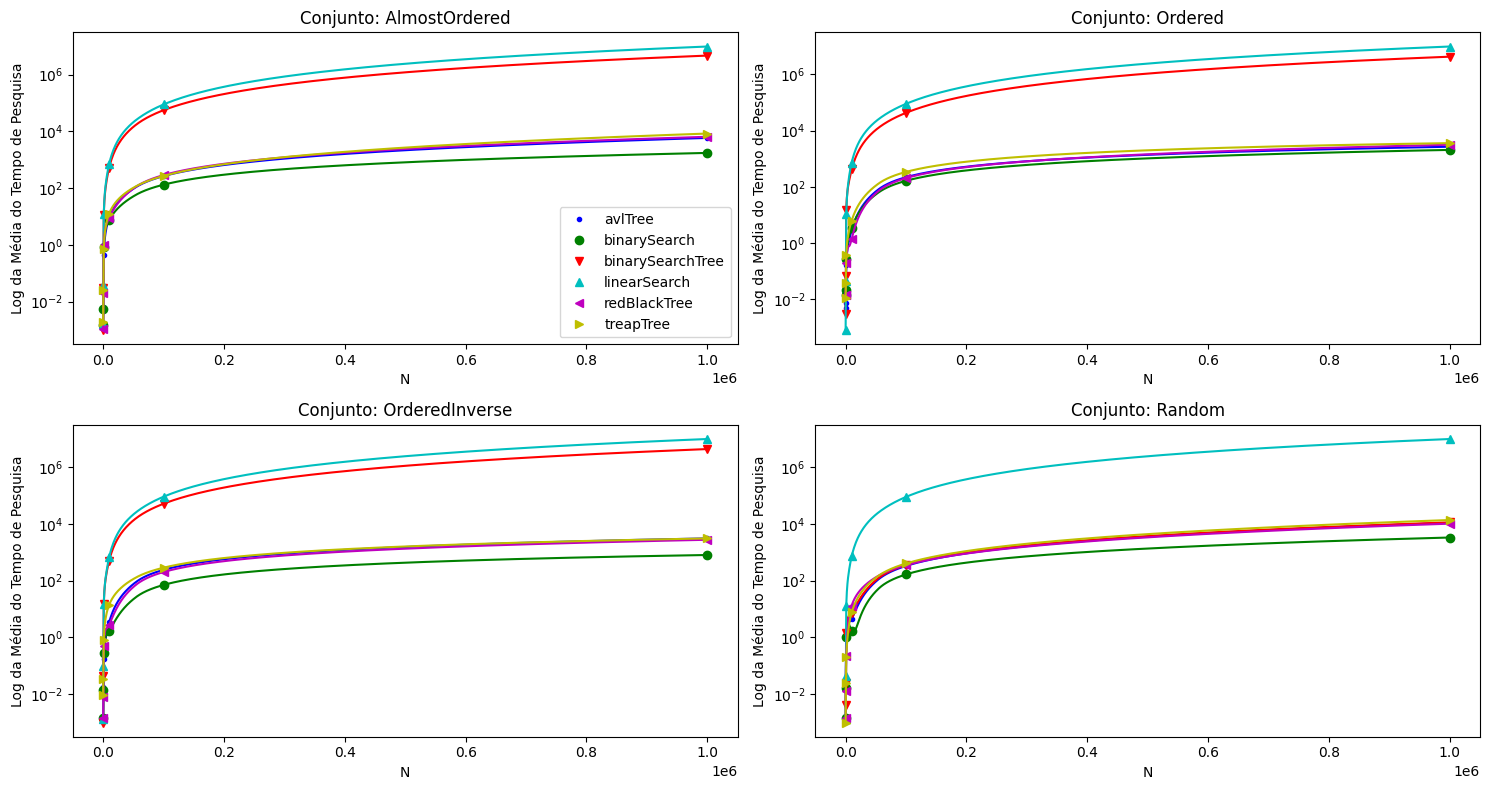

In [20]:
import matplotlib.pyplot as plt
import matplotlib.markers as mmarkers
import numpy as np
from scipy.interpolate import interp1d

num_sizes = len(df['DatasetName'].unique())

# Calculate the number of rows and columns for the GridSpec layout
num_cols = 2
num_rows = (num_sizes + num_cols - 1) // num_cols

# Create the figure and GridSpec layout
fig = plt.figure(figsize=(15, 4 * num_rows))
gs = fig.add_gridspec(num_rows, num_cols)

# Define colors and markers for the algorithms
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = list(mmarkers.MarkerStyle.filled_markers)

# Iterate over each dataset size and plot the corresponding data
for i, dataset in enumerate(df['DatasetName'].unique()):
    row = i // num_cols
    col = i % num_cols
    ax = fig.add_subplot(gs[row, col])
    df_subset = df[df['DatasetName'] == dataset]
    
    for j, algorithm in enumerate(df['Algorithm'].unique()):
        # print(algorithm)
        df_subset2 = df_subset[df_subset['Algorithm'] == algorithm].sort_values(by='DatasetSize')
        # print(df_subset2)
        # Interpolation
        # x = df_subset2['DatasetSize'].unique()
        x = df_subset2['DatasetSize']
        # print(x)
        y = df_subset2['Time Pesquisa_mean']
        f = interp1d(x.values, y, kind='quadratic')  # Using cubic interpolation

        # Create smooth x values for interpolation
        x_smooth = np.linspace(x.min(), x.max(), 1000)
        y_smooth = f(x_smooth)
        
        # Plot the original points
        ax.plot(x, y, 
                label=algorithm, 
                color=colors[j % len(colors)], 
                marker=markers[j % len(markers)], 
                linestyle='None')
        
        # Plot the interpolated line
        ax.plot(x_smooth, y_smooth, 
                color=colors[j % len(colors)])
        # ax.plot(df_subset2['DatasetSize'], df_subset2['Time Mean'], 
        #         label=algorithm, 
        #         color=colors[j % len(colors)], 
        #         marker=markers[j % len(markers)])
        # break
    
    ax.set_title(f'Conjunto: {dataset}')
    ax.set_xlabel('N')
    ax.set_ylabel('Log da Média do Tempo de Pesquisa')
    if i == 0:
        ax.legend()
    # ax.set_xlim(0, 1000000)
    # ax.set_ylim(0, 5000)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    

# Adjust the layout
plt.tight_layout()
plt.savefig('figures/tempo_pesquisa.png', dpi=300)
plt.show()


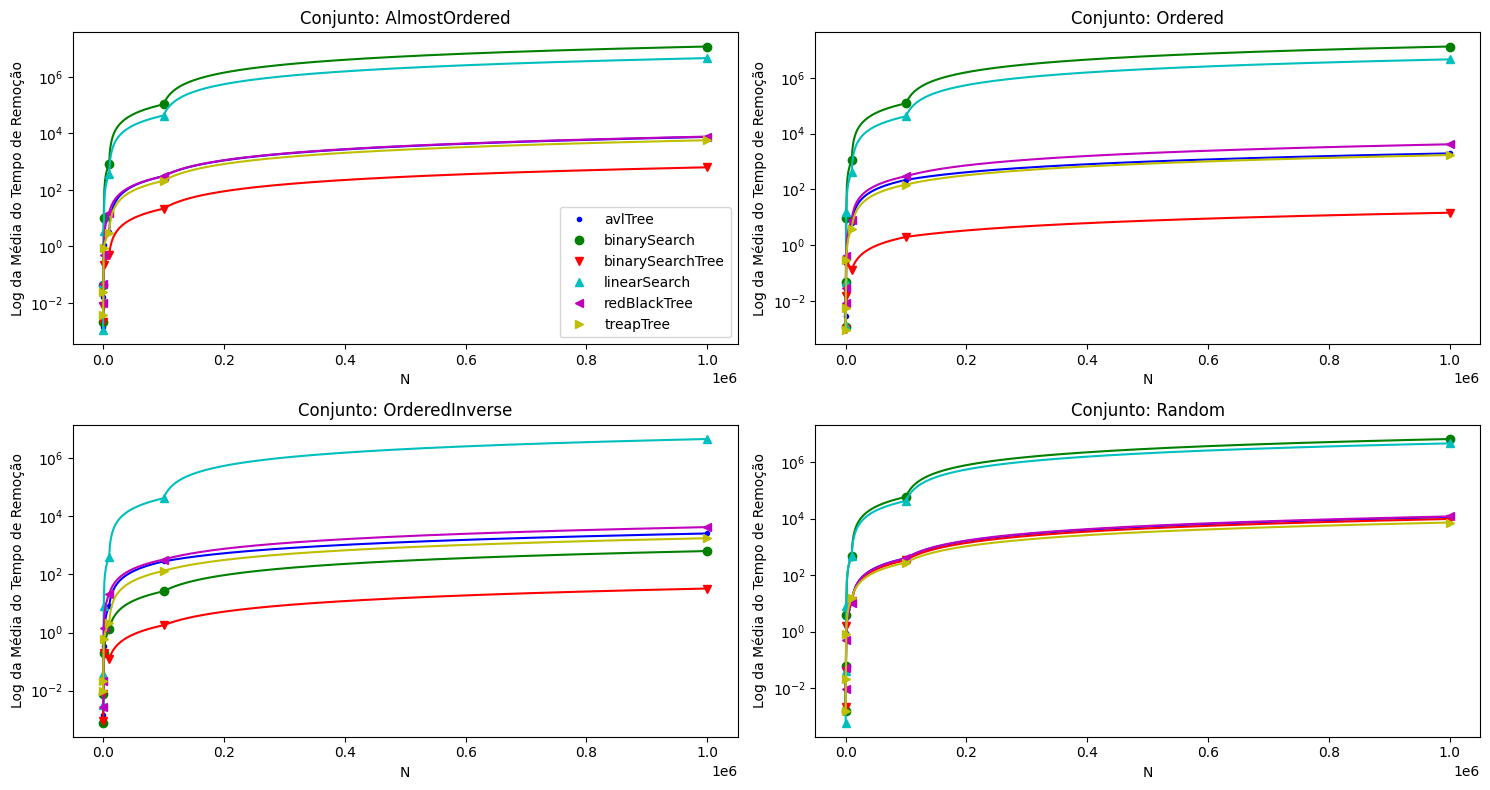

In [19]:
import matplotlib.pyplot as plt
import matplotlib.markers as mmarkers
import numpy as np
from scipy.interpolate import interp1d

num_sizes = len(df['DatasetName'].unique())

# Calculate the number of rows and columns for the GridSpec layout
num_cols = 2
num_rows = (num_sizes + num_cols - 1) // num_cols

# Create the figure and GridSpec layout
fig = plt.figure(figsize=(15, 4 * num_rows))
gs = fig.add_gridspec(num_rows, num_cols)

# Define colors and markers for the algorithms
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = list(mmarkers.MarkerStyle.filled_markers)

# Iterate over each dataset size and plot the corresponding data
for i, dataset in enumerate(df['DatasetName'].unique()):
    row = i // num_cols
    col = i % num_cols
    ax = fig.add_subplot(gs[row, col])
    df_subset = df[df['DatasetName'] == dataset]
    
    for j, algorithm in enumerate(df['Algorithm'].unique()):
        # print(algorithm)
        df_subset2 = df_subset[df_subset['Algorithm'] == algorithm].sort_values(by='DatasetSize')
        # print(df_subset2)
        # Interpolation
        # x = df_subset2['DatasetSize'].unique()
        x = df_subset2['DatasetSize']
        # print(x)
        y = df_subset2['Time Retira_mean']
        f = interp1d(x.values, y, kind='linear')  # Using cubic interpolation

        # Create smooth x values for interpolation
        x_smooth = np.linspace(x.min(), x.max(), 1000)
        y_smooth = f(x_smooth)
        
        # Plot the original points
        ax.plot(x, y, 
                label=algorithm, 
                color=colors[j % len(colors)], 
                marker=markers[j % len(markers)], 
                linestyle='None')
        
        # Plot the interpolated line
        ax.plot(x_smooth, y_smooth, 
                color=colors[j % len(colors)])
        # ax.plot(df_subset2['DatasetSize'], df_subset2['Time Mean'], 
        #         label=algorithm, 
        #         color=colors[j % len(colors)], 
        #         marker=markers[j % len(markers)])
        # break
    
    ax.set_title(f'Conjunto: {dataset}')
    ax.set_xlabel('N')
    ax.set_ylabel('Log da Média do Tempo de Remoção')
    if i == 0:
        ax.legend()
    # ax.set_xlim(0, 1000000)
    # ax.set_ylim(0, 5000)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    

# Adjust the layout
plt.tight_layout()
plt.savefig('figures/tempo_remocao.png', dpi=300)
plt.show()


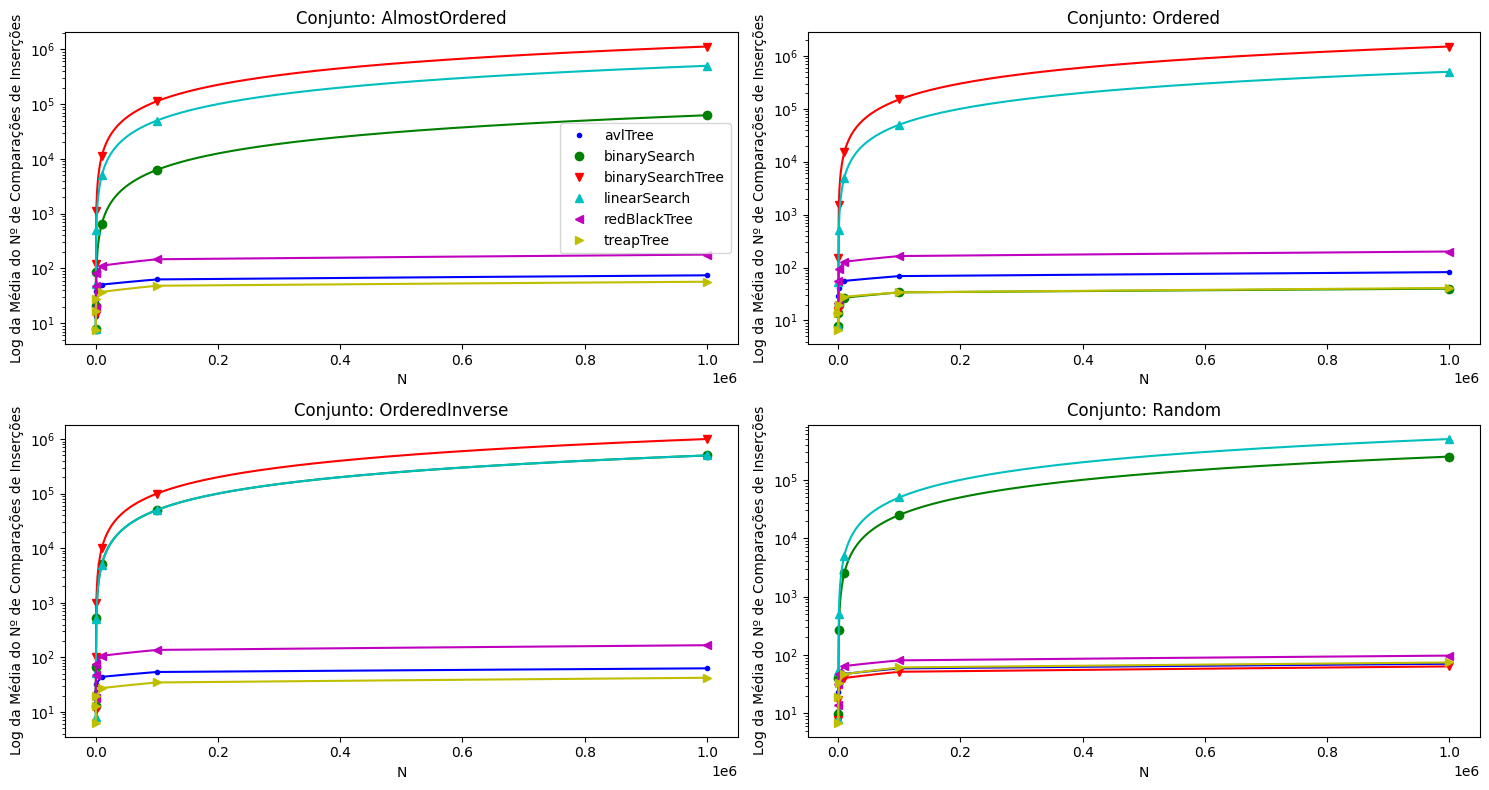

In [11]:
import matplotlib.pyplot as plt
import matplotlib.markers as mmarkers
import numpy as np
from scipy.interpolate import interp1d

num_sizes = len(df['DatasetName'].unique())

# Calculate the number of rows and columns for the GridSpec layout
num_cols = 2
num_rows = (num_sizes + num_cols - 1) // num_cols

# Create the figure and GridSpec layout
fig = plt.figure(figsize=(15, 4 * num_rows))
gs = fig.add_gridspec(num_rows, num_cols)

# Define colors and markers for the algorithms
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = list(mmarkers.MarkerStyle.filled_markers)

# Iterate over each dataset size and plot the corresponding data
for i, dataset in enumerate(df['DatasetName'].unique()):
    row = i // num_cols
    col = i % num_cols
    ax = fig.add_subplot(gs[row, col])
    df_subset = df[df['DatasetName'] == dataset]
    
    for j, algorithm in enumerate(df['Algorithm'].unique()):
        # print(algorithm)
        df_subset2 = df_subset[df_subset['Algorithm'] == algorithm].sort_values(by='DatasetSize')
        # print(df_subset2)
        # Interpolation
        # x = df_subset2['DatasetSize'].unique()
        x = df_subset2['DatasetSize']
        # print(x)
        y = df_subset2['Counter Comparisons Insere_mean']
        f = interp1d(x.values, y, kind='linear')  # Using cubic interpolation

        # Create smooth x values for interpolation
        x_smooth = np.linspace(x.min(), x.max(), 1000)
        y_smooth = f(x_smooth)
        
        # Plot the original points
        ax.plot(x, y, 
                label=algorithm, 
                color=colors[j % len(colors)], 
                marker=markers[j % len(markers)], 
                linestyle='None')
        
        # Plot the interpolated line
        ax.plot(x_smooth, y_smooth, 
                color=colors[j % len(colors)])
        # ax.plot(df_subset2['DatasetSize'], df_subset2['Time Mean'], 
        #         label=algorithm, 
        #         color=colors[j % len(colors)], 
        #         marker=markers[j % len(markers)])
        # break
    
    ax.set_title(f'Conjunto: {dataset}')
    ax.set_xlabel('N')
    ax.set_ylabel('Log da Média do Nº de Comparações de Inserções')
    if i == 0:
        ax.legend()
    # ax.set_xlim(0, 1000000)
    # ax.set_ylim(0, 5000)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    

# Adjust the layout
plt.tight_layout()
plt.savefig('figures/comparacoes_insere.png', dpi=300)
plt.show()


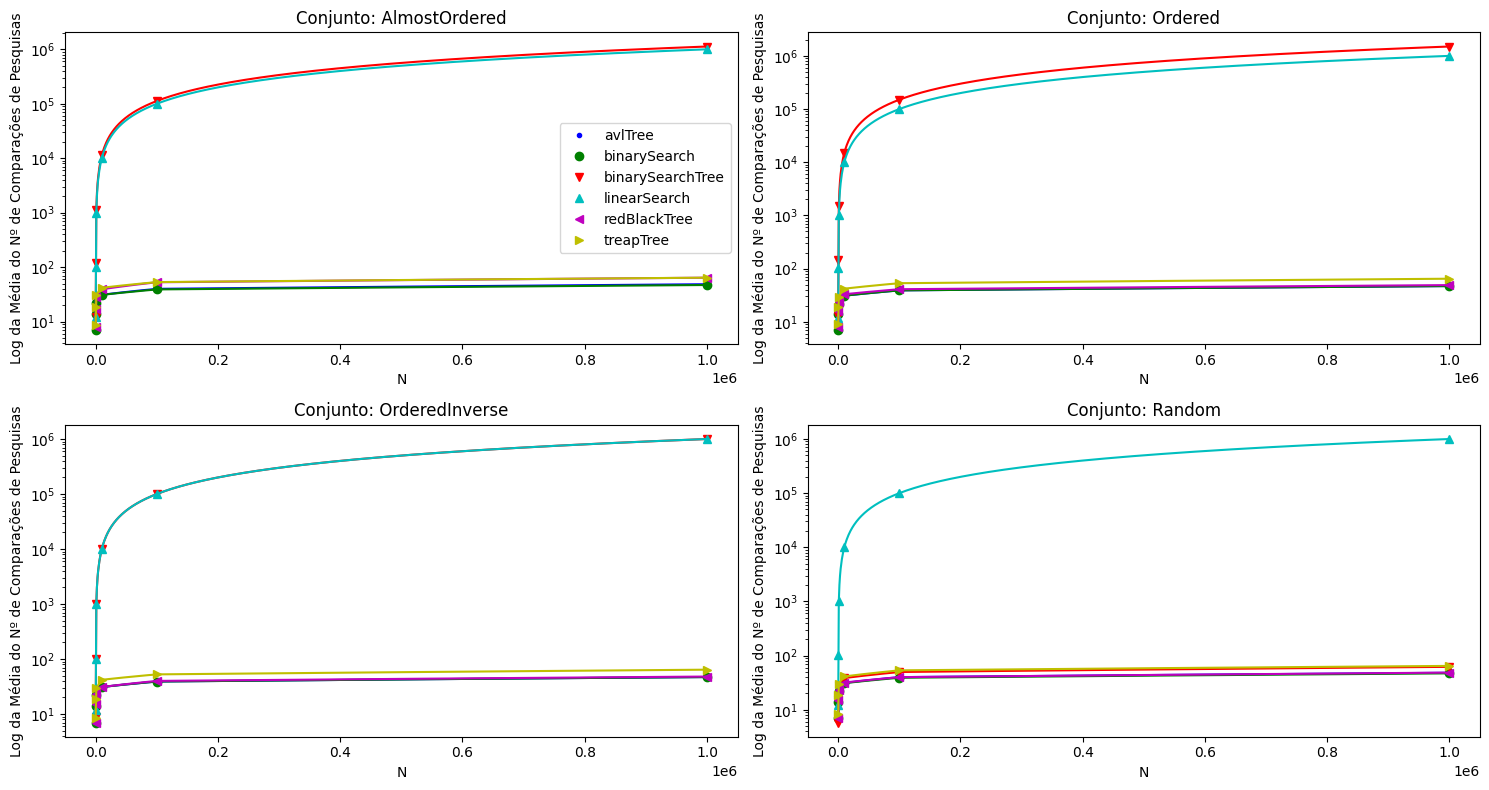

In [12]:
import matplotlib.pyplot as plt
import matplotlib.markers as mmarkers
import numpy as np
from scipy.interpolate import interp1d

num_sizes = len(df['DatasetName'].unique())

# Calculate the number of rows and columns for the GridSpec layout
num_cols = 2
num_rows = (num_sizes + num_cols - 1) // num_cols

# Create the figure and GridSpec layout
fig = plt.figure(figsize=(15, 4 * num_rows))
gs = fig.add_gridspec(num_rows, num_cols)

# Define colors and markers for the algorithms
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = list(mmarkers.MarkerStyle.filled_markers)

# Iterate over each dataset size and plot the corresponding data
for i, dataset in enumerate(df['DatasetName'].unique()):
    row = i // num_cols
    col = i % num_cols
    ax = fig.add_subplot(gs[row, col])
    df_subset = df[df['DatasetName'] == dataset]
    
    for j, algorithm in enumerate(df['Algorithm'].unique()):
        # print(algorithm)
        df_subset2 = df_subset[df_subset['Algorithm'] == algorithm].sort_values(by='DatasetSize')
        # print(df_subset2)
        # Interpolation
        # x = df_subset2['DatasetSize'].unique()
        x = df_subset2['DatasetSize']
        # print(x)
        y = df_subset2['Counter Comparisons Pesquisa_mean']
        f = interp1d(x.values, y, kind='linear')  # Using cubic interpolation

        # Create smooth x values for interpolation
        x_smooth = np.linspace(x.min(), x.max(), 1000)
        y_smooth = f(x_smooth)
        
        # Plot the original points
        ax.plot(x, y, 
                label=algorithm, 
                color=colors[j % len(colors)], 
                marker=markers[j % len(markers)], 
                linestyle='None')
        
        # Plot the interpolated line
        ax.plot(x_smooth, y_smooth, 
                color=colors[j % len(colors)])
        # ax.plot(df_subset2['DatasetSize'], df_subset2['Time Mean'], 
        #         label=algorithm, 
        #         color=colors[j % len(colors)], 
        #         marker=markers[j % len(markers)])
        # break
    
    ax.set_title(f'Conjunto: {dataset}')
    ax.set_xlabel('N')
    ax.set_ylabel('Log da Média do Nº de Comparações de Pesquisas')
    if i == 0:
        ax.legend()
    # ax.set_xlim(0, 1000000)
    # ax.set_ylim(0, 5000)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    

# Adjust the layout
plt.tight_layout()
plt.savefig('figures/comparacoes_pesquisa.png', dpi=300)
plt.show()


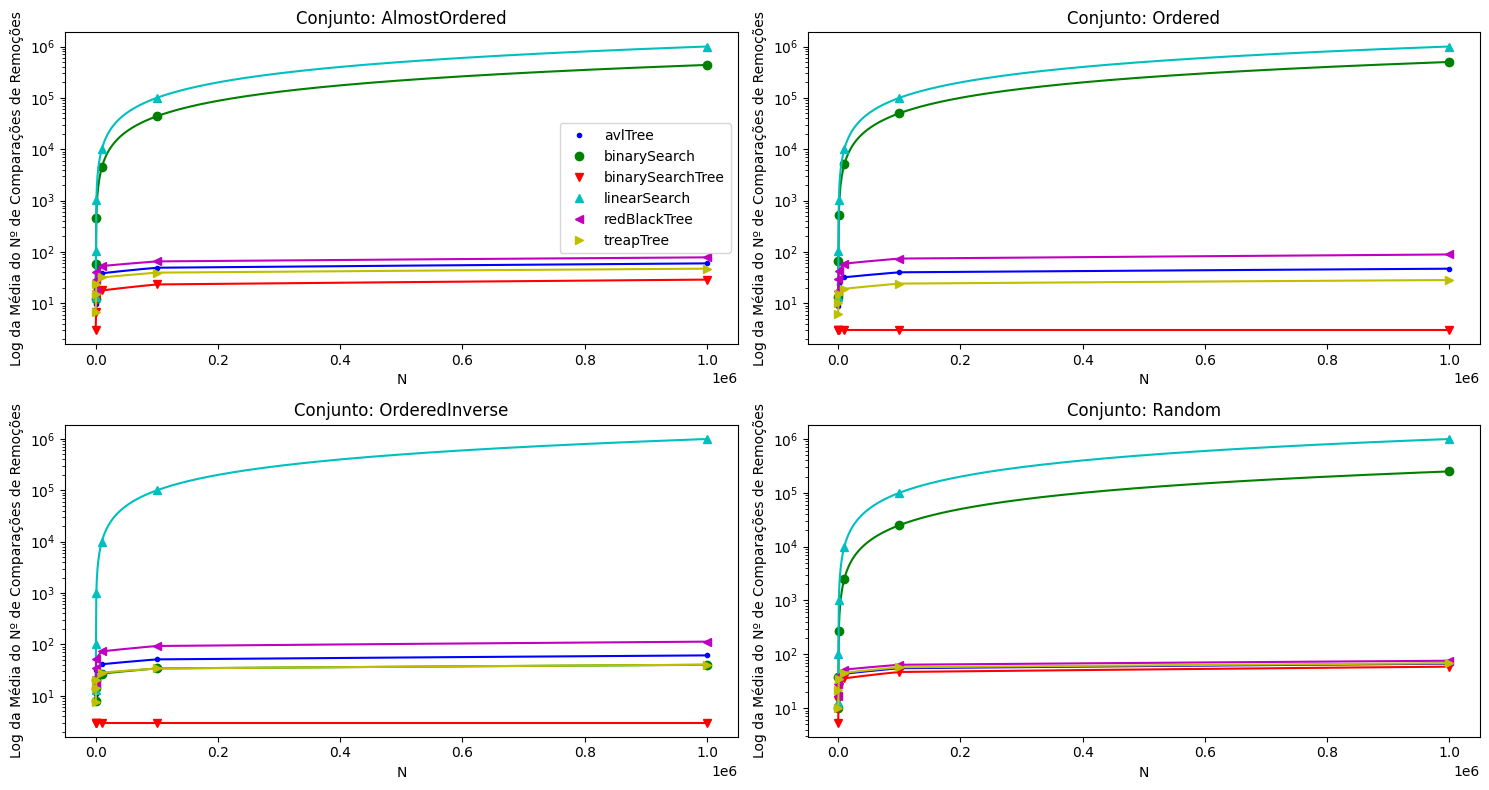

In [13]:
import matplotlib.pyplot as plt
import matplotlib.markers as mmarkers
import numpy as np
from scipy.interpolate import interp1d

num_sizes = len(df['DatasetName'].unique())

# Calculate the number of rows and columns for the GridSpec layout
num_cols = 2
num_rows = (num_sizes + num_cols - 1) // num_cols

# Create the figure and GridSpec layout
fig = plt.figure(figsize=(15, 4 * num_rows))
gs = fig.add_gridspec(num_rows, num_cols)

# Define colors and markers for the algorithms
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = list(mmarkers.MarkerStyle.filled_markers)

# Iterate over each dataset size and plot the corresponding data
for i, dataset in enumerate(df['DatasetName'].unique()):
    row = i // num_cols
    col = i % num_cols
    ax = fig.add_subplot(gs[row, col])
    df_subset = df[df['DatasetName'] == dataset]
    
    for j, algorithm in enumerate(df['Algorithm'].unique()):
        # print(algorithm)
        df_subset2 = df_subset[df_subset['Algorithm'] == algorithm].sort_values(by='DatasetSize')
        # print(df_subset2)
        # Interpolation
        # x = df_subset2['DatasetSize'].unique()
        x = df_subset2['DatasetSize']
        # print(x)
        y = df_subset2['Counter Comparisons Retira_mean']
        f = interp1d(x.values, y, kind='linear')  # Using cubic interpolation

        # Create smooth x values for interpolation
        x_smooth = np.linspace(x.min(), x.max(), 1000)
        y_smooth = f(x_smooth)
        
        # Plot the original points
        ax.plot(x, y, 
                label=algorithm, 
                color=colors[j % len(colors)], 
                marker=markers[j % len(markers)], 
                linestyle='None')
        
        # Plot the interpolated line
        ax.plot(x_smooth, y_smooth, 
                color=colors[j % len(colors)])
        # ax.plot(df_subset2['DatasetSize'], df_subset2['Time Mean'], 
        #         label=algorithm, 
        #         color=colors[j % len(colors)], 
        #         marker=markers[j % len(markers)])
        # break
    
    ax.set_title(f'Conjunto: {dataset}')
    ax.set_xlabel('N')
    ax.set_ylabel('Log da Média do Nº de Comparações de Remoções')
    if i == 0:
        ax.legend()
    # ax.set_xlim(0, 1000000)
    # ax.set_ylim(0, 5000)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    

# Adjust the layout
plt.tight_layout()
plt.savefig('figures/comparacoes_remocao.png', dpi=300)
plt.show()


In [43]:
df1m = df[df.DatasetSize == 1000000]
df1m

,Algorithm,DatasetName,DatasetSize,Time Insere_mean,Time Insere_std,Counter Comparisons Insere_mean,Counter Comparisons Insere_std,Time Pesquisa_mean,Time Pesquisa_std,Counter Comparisons Pesquisa_mean,Counter Comparisons Pesquisa_std,Time Retira_mean,Time Retira_std,Counter Comparisons Retira_mean,Counter Comparisons Retira_std
5,avlTree,AlmostOrdered,1000000,1.086122e+04,8308.379148,74.9,0.316228,5.867775e+03,551.290510,48.6,0.516398,7.493958e+03,275.911708,59.7,0.483046
11,avlTree,Ordered,1000000,7.121973e+03,7262.695477,82.0,0.000000,2.650705e+03,668.241457,47.0,0.000000,1.950858e+03,275.828541,47.0,0.000000
17,avlTree,OrderedInverse,1000000,7.013432e+03,7545.542820,63.0,0.000000,3.073742e+03,1066.561625,47.0,0.000000,2.568998e+03,885.617091,61.0,0.000000
23,avlTree,Random,1000000,1.781236e+04,7448.549992,71.0,0.000000,1.084908e+04,619.848129,48.2,0.421637,1.127219e+04,959.954755,67.0,0.000000
29,binarySearch,AlmostOrdered,1000000,1.749139e+06,15119.459463,62560.1,50.047644,1.738216e+03,255.317616,47.0,0.000000,1.182898e+07,135333.183908,437534.7,50.044536
35,binarySearch,Ordered,1000000,2.056264e+03,984.300254,40.0,0.000000,2.043483e+03,613.698028,47.0,0.000000,1.325727e+07,121697.056022,500055.0,0.000000
41,binarySearch,OrderedInverse,1000000,1.440581e+07,110735.866417,500056.0,0.000000,7.993654e+02,119.836672,47.0,0.000000,6.390016e+02,83.105623,40.0,0.000000
47,binarySearch,Random,1000000,7.284646e+06,78484.156250,250097.1,175.538188,3.299053e+03,357.972074,47.0,0.000000,6.553257e+06,57903.491173,249996.8,175.513089
53,binarySearchTree,AlmostOrdered,1000000,1.860890e+07,317747.572768,1125030.0,0.942809,4.661179e+06,165524.924907,1125028.0,0.942809,6.299378e+02,11.596564,28.8,0.918937
59,binarySearchTree,Ordered,1000000,2.061849e+07,155385.645340,1500000.0,0.000000,4.230815e+06,90575.752611,1499998.0,0.000000,1.452520e+01,0.218837,3.0,0.000000


In [49]:
(df1m.groupby(['DatasetName','Algorithm'])[['Time Insere_mean',
                                            'Time Insere_std',
                                            'Counter Comparisons Insere_mean',
                                            'Counter Comparisons Insere_std',
                                            'Time Pesquisa_mean',
                                            'Time Pesquisa_std',
                                            'Counter Comparisons Pesquisa_mean',
                                            'Counter Comparisons Pesquisa_std',
                                            'Time Retira_mean',
                                            'Time Retira_std',
                                            'Counter Comparisons Retira_mean',
                                            'Counter Comparisons Retira_std',
                                            ]]
 .mean()).round(2)

Time Insere_mean  Time Insere_std  \
DatasetName    Algorithm                                             
AlmostOrdered  avlTree                   10861.22          8308.38   
               binarySearch            1749139.00         15119.46   
               binarySearchTree       18608900.00        317747.57   
               linearSearch            5243837.00         82680.59   
               redBlackTree              18160.97          6737.55   
               treapTree                 20230.97          5851.19   
Ordered        avlTree                    7121.97          7262.70   
               binarySearch               2056.26           984.30   
               binarySearchTree       20618490.00        155385.65   
               linearSearch            5271276.00         61754.90   
               redBlackTree              11691.49          6237.36   
               treapTree                 10525.00          5183.96   
OrderedInverse avlTree                    7013.43          7545.54   
               binarySearch           14405810.00        110735.87   
               binarySearchTree       20431240.00        175528.28   
               linearSearch            5228772.00         38990.09   
               redBlackTree              12204.84          7329.63   
               treapTree                 11761.30          6700.02   
Random         avlTree                   17812.36          7448.55   
               binarySearch            7284646.00         78484.16   
               binarySearchTree          17107.61          7196.75   
               linearSearch            5244600.00         52493.36   
               redBlackTree              19974.59          6296.67   
               treapTree                 27402.78          5467.71   

                                 Counter Comparisons Insere_mean  \
DatasetName    Algorithm                                           
AlmostOrdered  avlTree                                      74.9   
               binarySearch                              62560.1   
               binarySearchTree                        1125030.0   
               linearSearch                             500002.9   
               redBlackTree                                178.9   
               treapTree                                    57.2   
Ordered        avlTree                                      82.0   
               binarySearch                                 40.0   
               binarySearchTree                        1500000.0   
               linearSearch                             500003.0   
               redBlackTree                                201.0   
               treapTree                                    41.2   
OrderedInverse avlTree                                      63.0   
               binarySearch                             500056.0   
               binarySearchTree                        1000001.0   
               linearSearch                             500002.8   
               redBlackTree                                167.0   
               treapTree                                    42.3   
Random         avlTree                                      71.0   
               binarySearch                             250097.1   
               binarySearchTree                             64.0   
               linearSearch                             500002.9   
               redBlackTree                                 98.0   
               treapTree                                    74.7   

                                 Counter Comparisons Insere_std  \
DatasetName    Algorithm                                          
AlmostOrdered  avlTree                                     0.32   
               binarySearch                               50.05   
               binarySearchTree                            0.94   
               linearSearch                                0.32   
               redBlackTree              